# K-means: Ejercicios

### Daniel Marín López

---

#### Importamos librerías

In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from kneed import KneeLocator

#### Variables Globales y Funciones

In [9]:
Kmax = 11 # Número máximo de clusters
SEED = 42

In [3]:
def BIC(K, grupos, X):
  """
  K: Número de grupos (clusters)
  grupos: Vector que contiene los grupos de los datos
  X: Matriz de datos
  """
  N = X.shape[0] # Número de datos
  P = X.shape[1] # Número de variables
  xi = np.zeros((1,K)) # Vector xi

  # Calculamos el sumario de xi en la fórmula
  for k in range(0, K):
    suma = 0
    for j in range(0, P):
      sigma = np.square(np.std(X[:, j]))
      sigma_j = np.square(np.std(X[grupos==k, j]))
      suma += 0.5*np.log(sigma + sigma_j)

    n_k = sum(grupos==k) # Número de elementos en el grupo k
    xi[0, k] = -n_k*suma

  bic = -2*np.sum(xi) + 2*K*P*np.log(N)
  return bic

Esta función se encarga de calcular la función BIC para K grupos:

*   K: Número de grupos
*   grupos: Vector de los grupos
*   X: Matriz de datos

La función BIC calcula el **Criterio de Información Bayesiano** (BIC) es una herramienta utilizada en los problemas de análisis de clusters para ayudar a determinar el número óptimo de grupos (K).

In [4]:
def Elbow_BIC_iter(Kmax=10, X=None, method='elbow'):
  """
  Kmax: Número máximo de clusters
  X: Matriz de datos
  method: Método de cálculo de BIC o Elbow
  """
  results = []
  K_range = range(1, Kmax)

  for k in K_range:
      kmeans = KMeans(n_clusters=k, random_state=SEED, n_init=10)
      if method == 'elbow':
        kmeans.fit(X)
        results.append(kmeans.inertia_)
      elif method == 'bic':
        grupos = kmeans.fit_predict(X)
        results.append(BIC(k, grupos, X))
      else:
        raise ValueError("El método debe ser 'elbow' o 'bic'")


  if method == 'bic':
    bic_k = np.argmin(results) + 1
    return K_range, results, bic_k
  else:
    kl = KneeLocator(K_range, results, curve="convex", direction="decreasing")
    elbow_k = kl.elbow
    return K_range, results, elbow_k

Esta función fue hecha para calcular en un rango de K tanto la **función BIC** como el método del codo, que para ello necesitamos sacar la **inercia** (la suma de las distancias cuadradas de cada punto a su centroide más cercano) del modelo obtenida en cada K. Luego usaremos la librería `Kneed` que con la función `KneeLocator` nos dirá el punto donde se realiza el codo. Los parámetros que usaremos son los siguientes:

*   **x**: El rango de K necesarios
*   **y**: Array de resultados obtenidos
*   **curve**: Indica el tipo de curva, como queremos que se detecten los codos tenemos que indicar `convex` ya que los codos son funciones convexas.
*   **direction**: Indica en que dirección va la curva, como los codos en la mayoría de los casos van decreciendo tenemos que idicar que la dirección es decreciente.

Para más información sobre la librería aquí hay algunos enlaces:

*   [KneedLocator](https://kneed.readthedocs.io/en/stable/api.html#kneelocator)
*   [Página de Kneed en Python](https://pypi.org/project/kneed/)





---
#### Ejercicio 1

Utiliza el algoritmo K-Means para agrupar los datos del fichero *synthetic_data1.csv* y visualiza los resultados gráficamente.

* Averigua el número de clusters óptimo utilizando Elbow y BIC.
* Visualiza los resultados utilizando un gráfico de dispersión. Cada punto en el gráfico debe ser coloreado de acuerdo con el cluster al que pertenece.
* Comprueba si este resultado coincide con la agrupación real que puedes encontrar en el fichero *synthetic_data1_with_labels.csv*.
---

### 1. Carga de los datos
---

Cargamos los datos.

In [5]:
data1 = pd.read_csv('synthetic_data1.csv')
data1.head()

,x,y
0,7.933768,3.681179
1,4.760600,7.518566
2,2.257447,1.617497
3,2.960558,1.805772
4,1.582530,1.588611


In [6]:
data_real = pd.read_csv('synthetic_data1_with_labels.csv')
data_real.head()

,x,y,class
0,7.933768,3.681179,2.0
1,4.760600,7.518566,3.0
2,2.257447,1.617497,1.0
3,2.960558,1.805772,1.0
4,1.582530,1.588611,1.0


### 2. Visualización de los datos
---

Hacemos una visualización de nuestros datos.

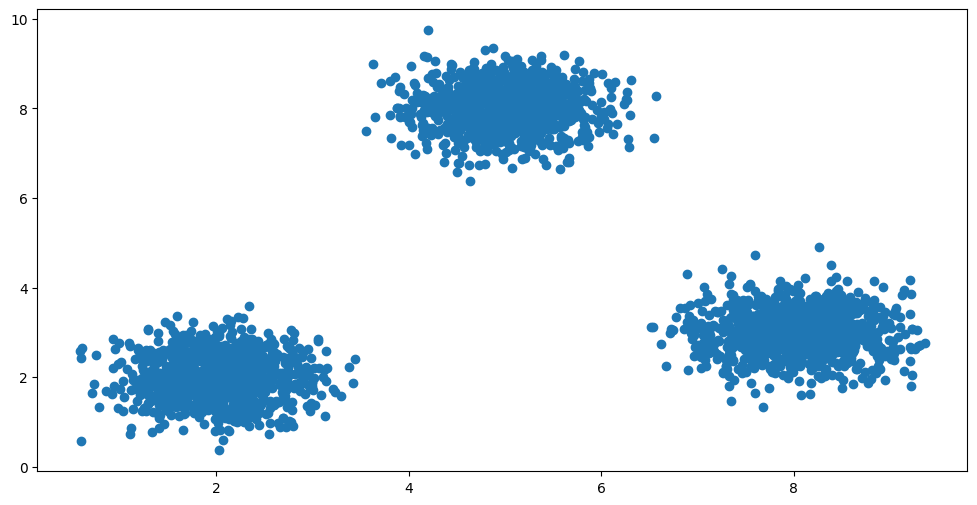

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(data1['x'], data1['y'])
plt.show()

Podemos observar que la distribución es bastante sencilla donde los datos se agrupan en tres conjuntos.

### 3. Buscar el K más óptimo
---

Ahora averiguaremos el nº de K óptimo tanto con BIC como con el codo usando la función `Elbow_BIC_iter`.

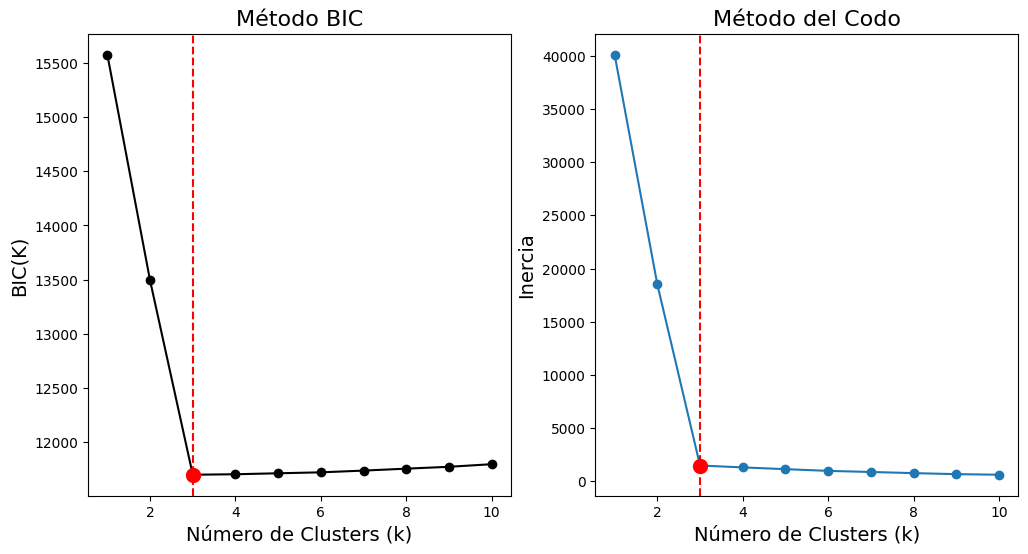

In [10]:
## Calculo del BIC y el codo
X = np.array(data1[['x', 'y']])

K_range, BIC_array, elbow_bic = Elbow_BIC_iter(Kmax, X, 'bic')
_, Elbow_array, elbow_in = Elbow_BIC_iter(Kmax, X, 'elbow')

# Dibujamos el BIC y el codo obtenido para cada valor de k
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, BIC_array, "ko-")
plt.title("Método BIC", fontsize=16)
plt.xlabel("Número de Clusters (k)", fontsize=14)
plt.ylabel("BIC(K)", fontsize=14)
plt.axvline(x=elbow_bic, linestyle="--", color="red", label=f'Codo en k={elbow_bic}')
plt.scatter(elbow_bic, BIC_array[elbow_bic - 1], color='red', s=100, zorder=3)

plt.subplot(1, 2, 2)
plt.plot(K_range, Elbow_array, marker='o')
plt.xlabel('Número de Clusters (k)', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
plt.title('Método del Codo', fontsize=16)
plt.axvline(x=elbow_in, linestyle="--", color="red", label=f'Codo en k={elbow_in}')
plt.scatter(elbow_in, Elbow_array[elbow_in - 1], color='red', s=100, zorder=3)

plt.show()

Para visualizar mejor el K obtenido lo hemos puesto en un punto rojo y una línea de puntos. De esta forma se puede ver claramente el K obtenido en ambos métodos, que en este caso es el mismo resultado. El K obtenido es de 3 grupos como cabia esperar.

### 4. Creación del modelo
---

Creamos el modelo y vemos cuanto es tanto el BIC como la inercia.

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=SEED)
kmeans_model.fit(X)
grupos = kmeans_model.predict(X)
centroides = kmeans_model.cluster_centers_

print(f"BIC: {BIC(elbow_bic, grupos, X)}")
print(f"Inercia: {kmeans_model.inertia_}")

BIC: 11700.310410903397
Inercia: 1487.6063432075075


### 5. Comparación de resultados.
---

Por último, visualizamos nuestro conjunto comparando nuestro resultados con las etiquetas puestas por el profesor.

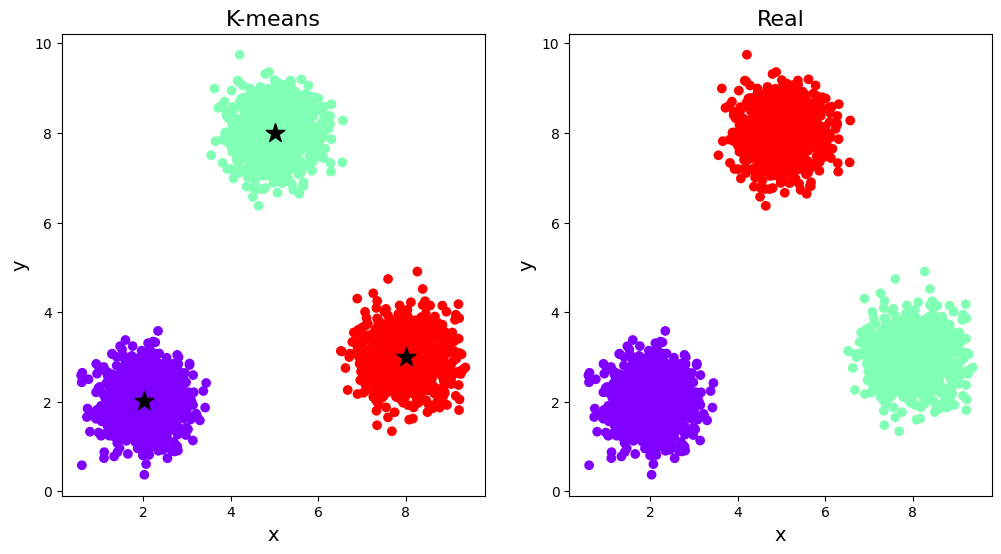

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=grupos, cmap='rainbow')
plt.title("K-means", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='*', s=200, c='black')

plt.subplot(1, 2, 2)
plt.scatter(data_real['x'], data_real['y'], c=data_real['class'], cmap='rainbow')
plt.title("Real", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

plt.show()

Vemos que nuestro modelo ha podido identificar los clústeres sin problemas.

---
#### Ejercicio 2

Realiza el ejercicio anterior con el dataset de la flor Iris. A la hora de visualizar los datos, para tener solo dos dimensiones en el gráfico, usa los valores del pétalo para un gráfico y los del sépalo para otro.

---

### 1. Carga de datos

Cargamos los datos de la flor iris.

In [11]:
data_iris = sklearn.datasets.load_iris()
X = data_iris['data']
data_iris = pd.DataFrame(data=np.c_[data_iris['data'], data_iris['target']], columns=data_iris['feature_names'] + ['target'])
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 2. Visualización

Ahora haremos la visualización, hay que tener en cuenta que tenemos 4 características, asi que haremos dos gráficas:

* La primera será con el pétalo.
* La segunda será con el sépalo.

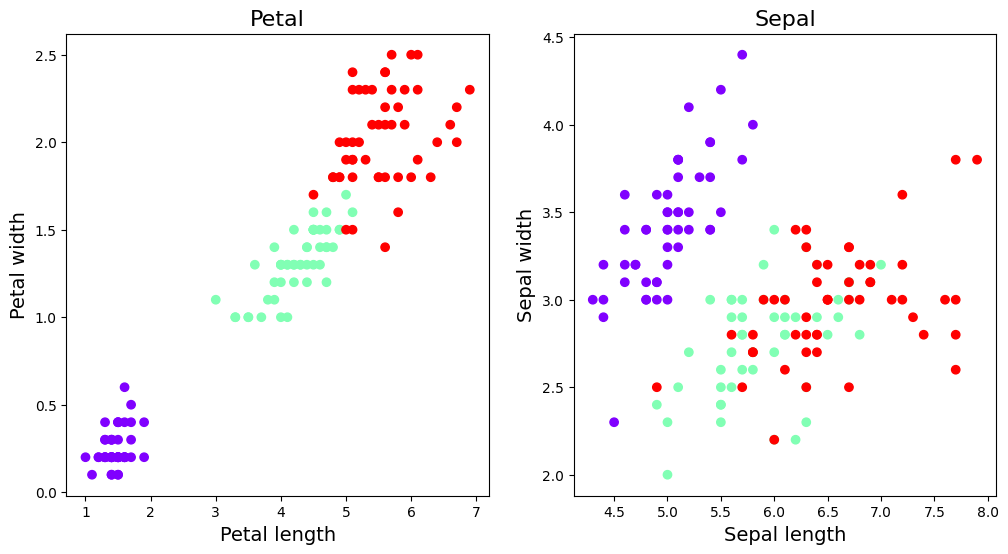

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_iris[['petal length (cm)']], data_iris[['petal width (cm)']], c=data_iris['target'], cmap='rainbow')
plt.title("Petal", fontsize=16)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(data_iris[['sepal length (cm)']], data_iris[['sepal width (cm)']], c=data_iris['target'], cmap='rainbow')
plt.title("Sepal", fontsize=16)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)

plt.show()

Aunque hayamos dividido las características para para la visualización, debemos usarlas todas para el modelo. Como hemos guardado la data en la variable `X`, usaremos esa para buscar el K óbtimo. Haremos tanto BIC como el codo de nuevo.



### 3. Buscar el K más óptimo
---

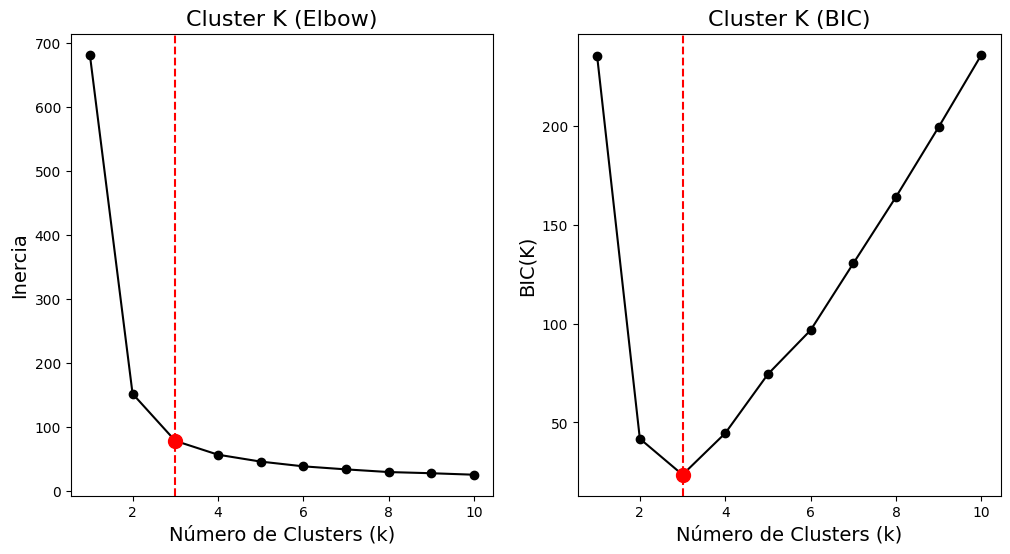

In [13]:
K_iris, res_iris, elbow_iris = Elbow_BIC_iter(Kmax, X, 'elbow')
_, bic_iris, bicbow_iris = Elbow_BIC_iter(Kmax, X, 'bic')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_iris, res_iris, "ko-")
plt.title("Cluster K (Elbow)", fontsize=16)
plt.xlabel("Número de Clusters (k)", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.axvline(x=elbow_iris, linestyle="--", color="red", label=f'Codo en k={elbow_iris}')
plt.scatter(elbow_iris, res_iris[elbow_iris - 1], color='red', s=100, zorder=3)

plt.subplot(1, 2, 2)
plt.plot(K_iris, bic_iris, "ko-")
plt.title("Cluster K (BIC)", fontsize=16)
plt.xlabel("Número de Clusters (k)", fontsize=14)
plt.ylabel("BIC(K)", fontsize=14)
plt.axvline(x=bicbow_iris, linestyle="--", color="red", label=f'Codo en k={bicbow_iris}')
plt.scatter(bicbow_iris, bic_iris[bicbow_iris - 1], color='red', s=100, zorder=3)

plt.show()

Vemos que en este caso, solamente el método del codo ha llegado a identificar 3 grupos. Por lo que usaremos el k del codo.

### 4. Creación del modelo
---

Creamos el modelo para la flor iris.

In [26]:
Kmeans_iris = KMeans(n_clusters=elbow_iris, random_state=SEED)
Kmeans_iris.fit(X)
iris_groups = Kmeans_iris.predict(X)
cen_iris = Kmeans_iris.cluster_centers_

print(f"BIC Iris: {BIC(bicbow_iris, iris_groups, X)}")
print(f"Inercia Iris: {Kmeans_iris.inertia_}")

BIC Iris: 20.453312821276555
Inercia Iris: 78.85566582597727


### 5. Comparación de resultados.
---

Ahora hacemos la comparación de los resultados. Como antes, primero haremos la del pétalo.

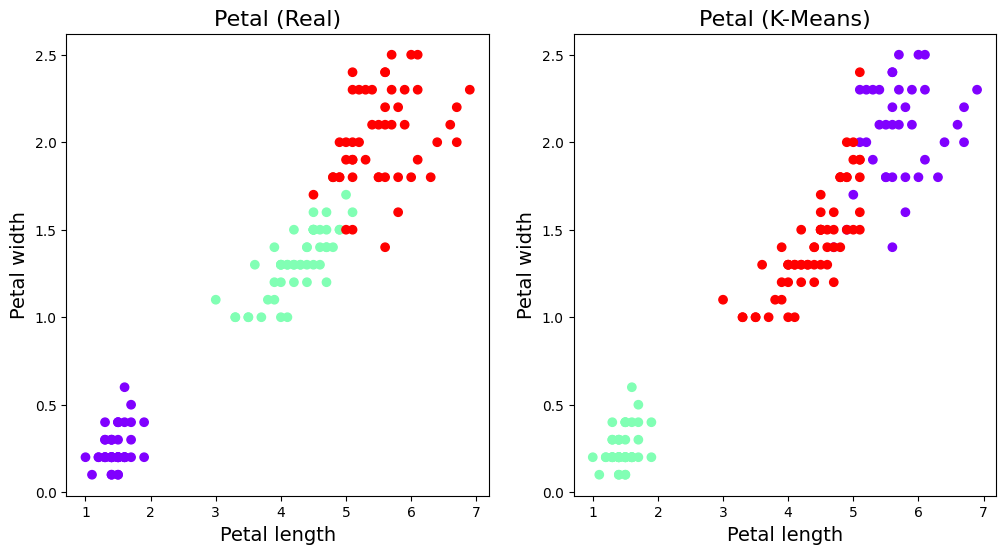

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_iris[['petal length (cm)']], data_iris[['petal width (cm)']], c=data_iris['target'], cmap='rainbow')
plt.title("Petal (Real)", fontsize=16)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(data_iris[['petal length (cm)']], data_iris[['petal width (cm)']], c=iris_groups, cmap='rainbow')
plt.title("Petal (K-Means)", fontsize=16)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
# plt.scatter(cen_iris[:, 0], cen_iris[:, 1], marker='*', s=200, c='black')

plt.show()

Y a continuación el sépalo.

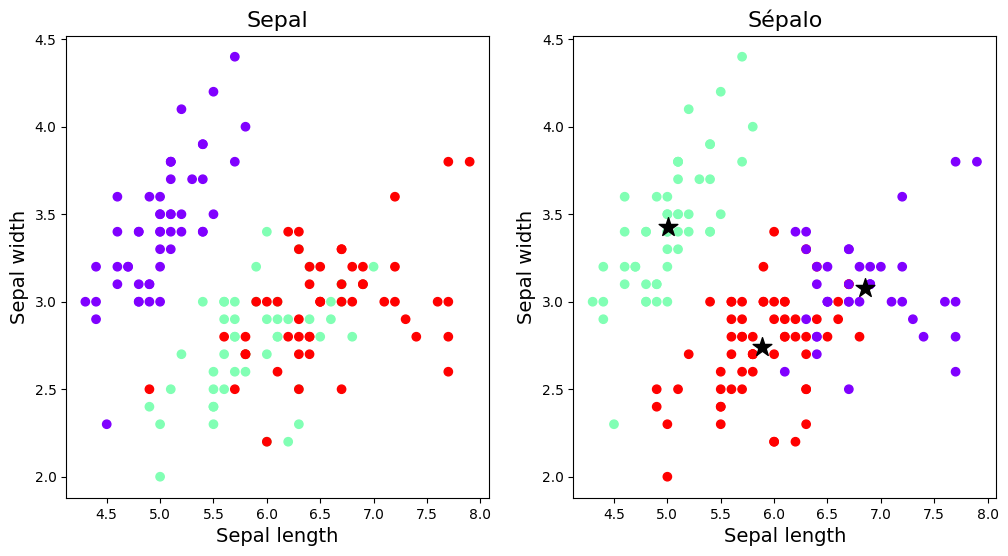

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_iris[['sepal length (cm)']], data_iris[['sepal width (cm)']], c=data_iris['target'], cmap='rainbow')
plt.title("Sepal", fontsize=16)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(data_iris[['sepal length (cm)']], data_iris[['sepal width (cm)']], c=iris_groups, cmap='rainbow')
plt.title("Sépalo", fontsize=16)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.scatter(cen_iris[:, 0], cen_iris[:, 1], marker='*', s=200, c='black')

plt.show()

Los resultados obtenidos muestran que ambas gráficas muestran los grupos más o menos bien formados aunque obviamente hay bastantes puntos mal etiquetados, eso se ve sobre todo en la segunda gráfica.